## Ссылка на диск с картированными чтениями


| | SRA accession  | Stage    |
|---:|:-------------|:-----------|
| 1 | SRR5836473  | 8 cell       |
| 2 | SRR3824222 | Epiblast    |
| 3 | SRR5836475  | ICM       |


[Bam-файлы и отчеты](https://drive.google.com/drive/folders/1hGzGjuUZNLIeUsCdSxbEzgthcV_BaqMw?usp=sharing)

# Установка FastQC

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

--2024-02-10 17:32:53--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip.1’

fastqc_v0.11.9.zip. 100%[===================>]   9.77M  11.1MB/s    in 0.9s    

2024-02-10 17:32:54 (11.1 MB/s) - ‘fastqc_v0.11.9.zip.1’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introdu

Можно получать данные секвенировия с ENA. Например, https://www.ebi.ac.uk/ena/browser/view/SRR5836473

#### Скачиваю данные с ENA, распаковываю их и делаю fastqc отчет. Затем  удаляю сначала образец секвенирования и папку FastQC для экономии места на диске.

In [ ]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
! gunzip SRR5836473_1.fastq.gz
! ls SRR* | xargs -P 2 -tI{} ./FastQC/fastqc {}

--2024-02-10 16:51:44--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  33.5MB/s    in 3m 23s  

2024-02-10 16:55:08 (32.2 MB/s) - ‘SRR5836473_1.fastq.gz’ saved [6856386252]

./FastQC/fastqc SRR5836473_1.fastq
Started analysis of SRR5836473_1.fastq
Approx 5% complete for SRR5836473_1.fastq
Approx 10% complete for SRR5836473_1.fastq
Approx 15% complete for SRR5836473_1.fastq
Approx 20% complete for SRR5836473_

In [ ]:
! rm SRR5836473_1.fastq

In [ ]:
!rm -rf FastQC

# Установка Bismark с зависимостями (+bowtie2, samtools)

In [2]:
! pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [4]:
! conda install -c bioconda bismark

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bismark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bismark-0.24.2             |       hdfd78af_0         7.7 MB  bioconda
    bowtie2-2.5.3              |  py310ha0a81b8_0        14.1 MB  bioconda
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    coreutils-8.25             |                1         9.1 MB  bioconda
    hisat2-2.2.1               |       hdbdd923_6        16.2 MB  bioconda
    htslib-1.19.1              |       h81da01d_1         2.9 MB  bioconda
    k8-0.2.5                   |       hdcf5f25_4         1.7 MB  bioconda
    libdeflate-1.18            |       h0b41bf4_0     

In [3]:
! samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM
  -C, --cram                 Output CRAM (requires -T)
  -1, --fast                 Use fast BAM compression (and default to --bam)
  -u, --uncompressed         Uncompressed BAM output (and default to --bam)
  -h, --with-header          Include header in SAM output
  -H, --header-only          Print SAM header only (no alignments)
      --no-header            Print SAM alignment records only [default]
  -c, --count                Print only the count of matching records
  -o, --output FILE          Write output to FILE [standard output]
  -U, --unoutput FILE, --output-unselected FILE
                             Output reads not selected by filters to FILE
  -p, --unmap                Set flag to UNMAP on reads not selected
                             then write to output file.
  -P, --fetch-pairs          Retrieve complete pairs even when outside of region

1. Скачиваем чтения из SRA с помощью SRAtoolkit или любым другим способом

2. Индексируем геном

3. Строим выравнивание

(Описание шагов 2-3 см https://www.bioinformatics.babraham.ac.uk/projects/bismark/Bismark_User_Guide.pdf)

#Внимание!

Т.к. вычислительные мощности нужны большие, то этот шаг был сделан за вас.
 Достаточно скачать выравнивания с диска https://drive.google.com/drive/folders/1hGzGjuUZNLIeUsCdSxbEzgthcV_BaqMw?usp=sharing или с сервера майнора)

#### Скаченные с приложенного диска файлы добавляю на свой диск и работаю с ними через обращение к конкретной папке на диске

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Проверка на корректность скаченных файлов

In [5]:
! md5sum -c checksum.md5

/content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.bam: OK
/content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam: OK
/content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.bam: OK


In [6]:
! ls /content/drive/MyDrive/bioinf

chr11.fa				SRR5836473_1_bismark_bt2_PE_report.txt
SRR3824222_1_bismark_bt2_pe.bam		SRR5836475_1_bismark_bt2_pe.bam
SRR3824222_1_bismark_bt2_PE_report.txt	SRR5836475_1_bismark_bt2_PE_report.txt
SRR5836473_1_bismark_bt2_pe.bam


In [7]:
! samtools view /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.41_41_length=140	99	chr11	40076664	0	140M	=	40076703	178	AATTTTTTTGGGGATTGTATTGAATTTGTAGATTGTTTTTGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATT	KKKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKKFKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7<77FF	NM:i:28	MD:Z:6G0A9C7C9C6C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C1	XM:Z:.................h.......x.........h......h.......hh.......h.........hx..hh...hh.....h.........h...hh..h..x......h..h........h...h..x.....h.	XR:Z:CT	XG:Z:CT
SRR5836473.41_41_length=140	147	chr11	40076703	0	139M	=	40076664	-178	TGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATTTGAAGTTTTTATTATATAGATTTTTTATTTTTTTAGTG	KKKKKAAFFFKKKKKKKKKKKKKFFKKKKKKKKKKFAFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:31	MD:Z:3C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C8C4C3A4C

In [9]:
! samtools sort /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam -o /content/drive/MyDrive/bioinf/sorted_8cell.bam
! samtools sort /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.bam -o /content/drive/MyDrive/bioinf/sorted_epiblast.bam
! samtools sort /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.bam -o /content/drive/MyDrive/bioinf/sorted_icm.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
[bam_sort_core] merging from 9 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


In [10]:
! samtools index  /content/drive/MyDrive/bioinf/sorted_8cell.bam
! samtools index  /content/drive/MyDrive/bioinf/sorted_epiblast.bam
! samtools index  /content/drive/MyDrive/bioinf/sorted_icm.bam

Сколько ридов закартировалось на регион 11347700-11367700; 40185800-40195800 в образцах?

In [11]:
! samtools view /content/drive/MyDrive/bioinf/sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view /content/drive/MyDrive/bioinf/sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

551
194


In [12]:
! samtools view /content/drive/MyDrive/bioinf/sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view /content/drive/MyDrive/bioinf/sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

1344
565


In [13]:
! samtools view /content/drive/MyDrive/bioinf/sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view /content/drive/MyDrive/bioinf/sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

797
274


#### Дедупликация

In [14]:
! find /content/drive/MyDrive/bioinf -name "*pe.bam" | xargs -P 4 -tI{} deduplicate_bismark  --bam  --paired  -o /content/drive/MyDrive/bioinf/s_{} {}

deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinf/s_/content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam
deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinf/s_/content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.bam /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.bam
deduplicate_bismark --bam --paired -o /content/drive/MyDrive/bioinf/s_/content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.bam /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.bam
Output filename was given as: /content/drive/MyDrive/bioinf/s_/content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam
Processing paired-end Bismark output file(s) (SAM format):
/content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.bam

Output filename was given as: /content/drive/MyDrive/bioinf/s_/content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.bam
Processing paired-end Bismark output file(s) (SA

#### Сохраняю файлы на диск

In [17]:
! mv SRR3824222_1_bismark_bt2_pe.deduplicated.bam SRR3824222_1_bismark_bt2_pe.deduplication_report.txt SRR5836473_1_bismark_bt2_pe.deduplicated.bam SRR5836473_1_bismark_bt2_pe.deduplication_report.txt SRR5836475_1_bismark_bt2_pe.deduplicated.bam SRR5836475_1_bismark_bt2_pe.deduplication_report.txt /content/drive/MyDrive/bioinf/

#### 11-ю хромосому мыши можно скачать с UCSC (сборка mm39). Скачиваю с ucsc и подготавливаю нужные данные с помощью bismark

In [ ]:
%cd /content/drive/MyDrive/bioinf
! gunzip chr11.fa.gz

In [ ]:
%cd /content/drive/MyDrive/bioinf
! mkdir mouse_chr
! mv chr11.fa ./mouse_chr/

In [21]:
! bismark_genome_preparation /content/drive/MyDrive/bioinf/mouse_chr/

Writing bisulfite genomes out into a single MFA (multi FastA) file

Bisulfite Genome Indexer version v0.24.2 (last modified: 19 May 2022)

Step I - Prepare genome folders - completed



Total number of conversions performed:
C->T:	26029159
G->A:	26024038

Step II - Genome bisulfite conversions - completed


Bismark Genome Preparation - Step III: Launching the Bowtie 2 indexer
Please be aware that this process can - depending on genome size - take several hours!
Settings:
  Output files: "BS_CT.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  genome_mfa.CT_co

#### Коллинг метилирования

In [22]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder /content/drive/MyDrive/bioinf/mouse_chr /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content/drive/MyDrive/bioinf')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count

In [26]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder /content/drive/MyDrive/bioinf/mouse_chr /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content/drive/MyDrive/bioinf')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count

In [28]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder /content/drive/MyDrive/bioinf/mouse_chr /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content/drive/MyDrive/bioinf')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count

In [ ]:
#как выглядел бы общий вид для трех команд
! find /content/drive/MyDrive/bioinf -name "*.deduplicated.bam" | xargs -P 4 -tI{} bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder //content/drive/MyDrive/bioinf/mouse_chr {}

In [29]:
%cd /content/drive/MyDrive/bioinf
! ls -lh

/content/drive/MyDrive/bioinf
total 13G
-rw------- 1 root root   13K Feb 11 11:45 CHG_CTOB_SRR3824222_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root  7.7K Feb 11 12:20 CHG_CTOB_SRR5836473_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root  9.4K Feb 11 13:06 CHG_CTOB_SRR5836475_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root   14K Feb 11 11:45 CHG_CTOT_SRR3824222_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root  8.2K Feb 11 12:20 CHG_CTOT_SRR5836473_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root   10K Feb 11 13:06 CHG_CTOT_SRR5836475_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root  157M Feb 11 11:45 CHG_OB_SRR3824222_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root   51M Feb 11 12:20 CHG_OB_SRR5836473_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root   84M Feb 11 13:06 CHG_OB_SRR5836475_1_bismark_bt2_pe.deduplicated.txt.gz
-rw------- 1 root root  157M Feb 11 11:45 CHG_OT_SRR3824222_1_bismark_bt2_p

In [27]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_PE_report.txt -mbias_report /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report /content/drive/MyDrive/b

In [25]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_PE_report.txt -mbias_report /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report /content/drive/MyDrive/b

In [30]:
! bismark2report --alignment_report /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_PE_report.txt -mbias_report //content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR5836475_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_PE_report.txt <
Processing alignment report /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> //content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report //content/drive/MyDrive

#### Уставновка необходимых пакетов

In [5]:
! pip install pyGenomeTracks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.1 MB/s eta 0:00:00
  Using cached intervaltree-3.1.0-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybedtools-0.9.1-cp310-cp310-linux_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 18.0 MB/s eta 0:00:00
  Using cached asciitree-0.3.3-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.9 

In [6]:
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 639.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [7]:
! conda install bioconda/label/cf201901::ucsc-fetchchromsizes

Channels:
 - conda-forge
 - bioconda/label/cf201901
 - bioconda
Platform: linux-64
Solving environment: | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconda/label/cf201901::ucsc-fetchchromsizes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.42              |       h2797004_0         282 KB  conda-forge
    mysql-connector-c-6.1.11   |    h659d440_1008         1.2 MB  conda-forge
    ucsc-fetchchromsizes-357   |       h5eb252a_2           5 KB  bioconda/label/cf201901
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  libpng             conda-forge/linux-64::libpng-1.6.42-h2797004_0 
  mysql-connector-c  conda-forge/linux-64::mysql-connector-c-6.1.11-h659d440_1008 
  ucsc-fetc

In [8]:
! fetchChromSizes mm10 > m.chrom.sizes

INFO: trying WGET /usr/bin/wget for database mm10
url: http://hgdownload.cse.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes


In [9]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Channels:
 - bioconda
 - conda-forge
 - bioconda/label/cf201901
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-bedgraphtobigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ucsc-bedgraphtobigwig-455  |       h2a80c09_0         2.4 MB  bioconda
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  ucsc-bedgraphtobi~ bioconda/linux-64::ucsc-bedgraphtobigwig-455-h2a80c09_0 



                                                                        
Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


In [10]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bedtools is already the newest version (2.30.0+dfsg-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


#### Распаковка файлов

In [38]:
! gunzip /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph.gz
! gunzip /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph.gz
! gunzip /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph.gz
! gunzip /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bismark.cov.gz
! gunzip /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bismark.cov.gz
! gunzip /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bismark.cov.gz

In [39]:
! head /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [40]:
! head /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bismark.cov

chr11	3050031	3050031	50	1	1
chr11	3050048	3050048	66.6666666666667	2	1
chr11	3050049	3050049	50	1	1
chr11	3050224	3050224	87.5	7	1
chr11	3050225	3050225	53.3333333333333	8	7
chr11	3050286	3050286	66.6666666666667	6	3
chr11	3050287	3050287	33.3333333333333	5	10
chr11	3050310	3050310	62.5	5	3
chr11	3050311	3050311	50	7	7
chr11	3050349	3050349	55.5555555555556	5	4


#### Построим распределения метилирования цитозинов по хромосоме

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [52]:
def hist_plot(ax, path, title):
    bedGraph = pd.read_csv(path,  delimiter='\t', skiprows=1, header=None)

    ax.hist(bedGraph[3], bins=100)
    ax.set_title(title)
    ax.set_xlabel('Процент метилированных цитозинов')
    ax.set_ylabel('Частота')

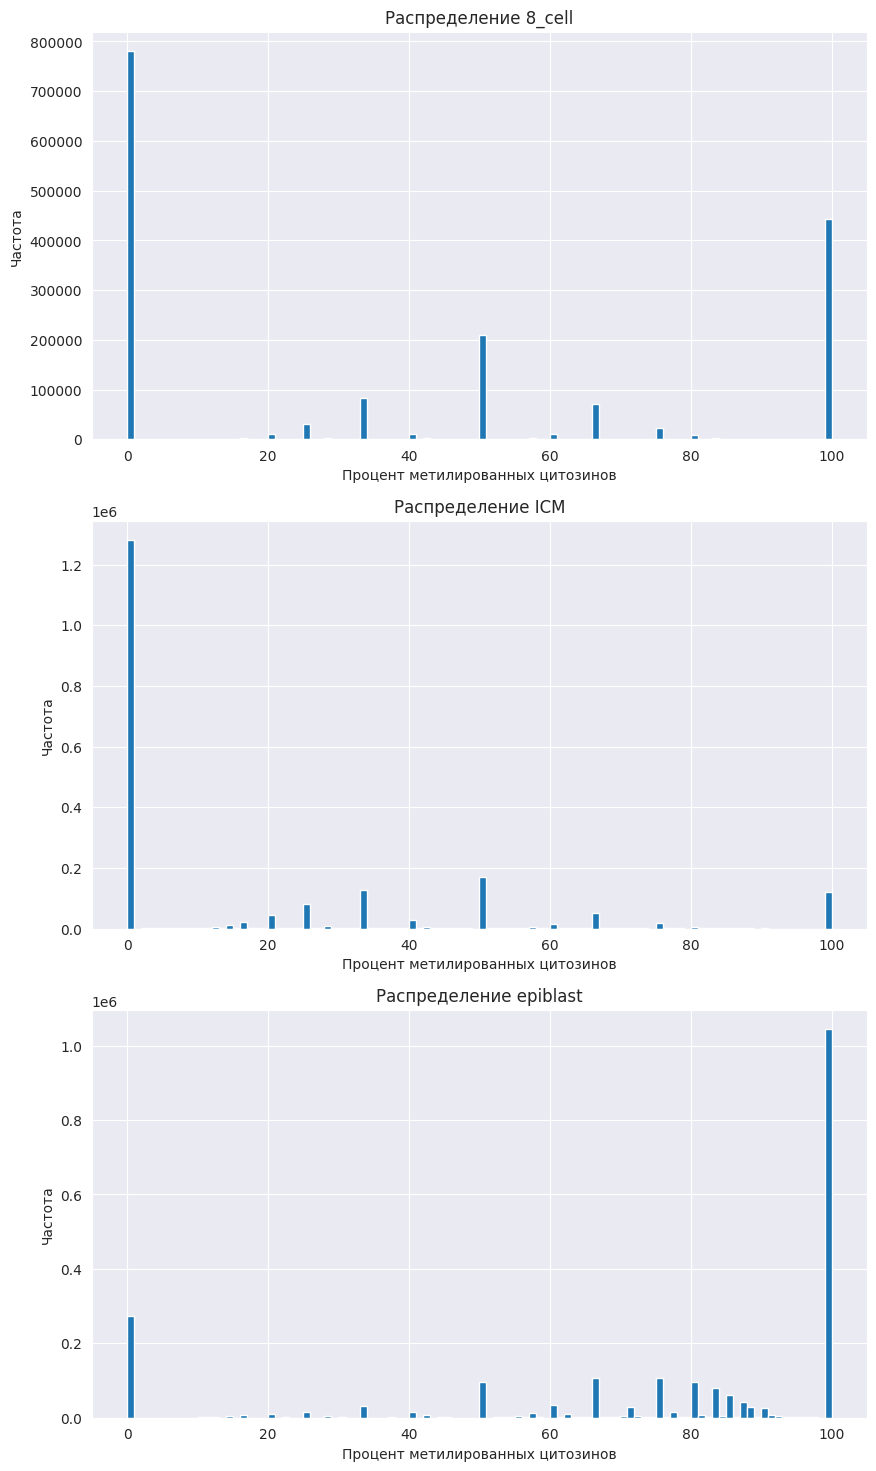

In [53]:
paths = ['/content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph',
         '/content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph',
         '/content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph']
names = ['Распределение 8_cell',
         'Распределение ICM',
         'Распределение epiblast']
fig, axs = plt.subplots(3, figsize=(10, 18))
for i in range(3):
    hist_plot(axs[i], paths[i], names[i])

#### Визуализируем уровень покрытия и метилирования

In [ ]:
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes  >  /content/drive/MyDrive/bioinf/s_8_cell.cover.bedGraph
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes  >  /content/drive/MyDrive/bioinf/s_icm.cover.bedGraph
! bedtools genomecov -bg -ibam /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes  >  /content/drive/MyDrive/bioinf/s_epiblast.cover.bedGraph

In [17]:
! bedGraphToBigWig  /content/drive/MyDrive/bioinf/s_8_cell.cover.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/cell8_coverage.bw
! bedGraphToBigWig  /content/drive/MyDrive/bioinf/s_epiblast.cover.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/epiblast_coverage.bw
! bedGraphToBigWig  /content/drive/MyDrive/bioinf/s_icm.cover.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/icm_coverage.bw

In [19]:
%cd /content/drive/MyDrive/bioinf/
! make_tracks_file --trackFiles cell8_coverage.bw icm_coverage.bw epiblast_coverage.bw -o tracks_cov.ini

/content/drive/MyDrive/bioinf
Adding bigwig file: cell8_coverage.bw
Adding bigwig file: icm_coverage.bw
Adding bigwig file: epiblast_coverage.bw


In [20]:
! pyGenomeTracks --tracks tracks_cov.ini --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_coverage]
INFO:pygenometracks.tracksClass:initialize 4. [icm_coverage]
INFO:pygenometracks.tracksClass:initialize 5. [epiblast_coverage]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.038223981857299805
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_coverage]
INFO:pygenometracks.tracksClass:plotting 4. [icm_coverage]
INFO:pygenometracks.tracksClass:plotting 5. [epiblast_coverage]


In [21]:
! bedGraphToBigWig /content/drive/MyDrive/bioinf/SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/cell8_meth.bw
! bedGraphToBigWig /content/drive/MyDrive/bioinf/SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/icm_meth.bw
! bedGraphToBigWig /content/drive/MyDrive/bioinf/SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes /content/drive/MyDrive/bioinf/epiblast_meth.bw

In [22]:
! make_tracks_file --trackFiles cell8_meth.bw icm_meth.bw epiblast_meth.bw -o tracks_meth.ini

Adding bigwig file: cell8_meth.bw
Adding bigwig file: icm_meth.bw
Adding bigwig file: epiblast_meth.bw


In [23]:
! pyGenomeTracks --tracks tracks_meth.ini --region chr11:3100030-3500030 -o image_meth.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_meth]
INFO:pygenometracks.tracksClass:initialize 4. [icm_meth]
INFO:pygenometracks.tracksClass:initialize 5. [epiblast_meth]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.028142690658569336
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_meth]
INFO:pygenometracks.tracksClass:plotting 4. [icm_meth]
INFO:pygenometracks.tracksClass:plotting 5. [epiblast_meth]
